In [ ]:
print("      ")

In [ ]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Size(1000sq ft)     Price(1000$) <br>
1                       300      <br>
2                       500


<b> Lets start the process with sample data as mentioned above (Size of the home & corresponding price) </b>

In [ ]:
#Input features
X_train = np.array([1,2])

#Output Target
y_train = np.array([300,500])

print(X_train, y_train)

<b> Compute_Cost :: Squared Error cost function </b>
<br>
<br>
Cost function to calculate the loss between the predicted and actual values

In [ ]:
def compute_cost(x, y, w, b):

    m    = x.shape[0] 
    cost = 0                                #Number of samples
    y_pred = []

    for i in range(0,m):                    #Loop through all data points
        f_wb = w * x[i] + b                 #Linear function to make the prediction
        #print(f_wb)
        y_pred.append(f_wb)
        cost = cost + (f_wb - y[i])**2      #Keep compounding the error by considering the difference between pred & truth
    total_cost = cost * (1/(2*m))           #Take average of the total cost

    return y_pred, total_cost

<b> Check the compute cost function with random w & b </b>

In [ ]:
w = 200
b = 100 

Y_pred, total_cost = compute_cost(X_train, y_train, w, b)

print(f"Actual cost is {y_train}")
print(f"Predictied price is {Y_pred} for the param w: {w} & b: {b}")
print(f"Total loss {total_cost}")

<b> If w = 200 and b = 100, then linear model predictions will be same as the ground truth. Zero error </b>

<b> Compute gradient function </b> <br>

Caclulate the slope(gradients) for the input X and Y array and return the scalar value of W & B

In [ ]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0

    for i in range(0,m):
        f_wb = w * x[i] + b
        dj_dw_temp = (f_wb - y[i]) * x[i]
        dj_db_temp = (f_wb - y[i])

        dj_dw += dj_dw_temp
        dj_db += dj_db_temp

        #print(dj_dw, dj_db)
    
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db

    return dj_dw, dj_db


Check the compute_gradient function with random w & b

In [ ]:
w = 200
b = 10
compute_gradients(X_train, y_train, w, b)

<b> Gradient descent function </b> <br>

* Update the value of w & b 
* update intensity depends on the learning rate alpha
* Either the updates will keep happening until convergence(based on threshold) is reached or until iterations defined is reached
* Keep calculateing the cost for each updated w & b which will be useful to plot the cost function
* At the end of the function, final best w and best b will be retrieved 

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha=0.01, num_iter=50, conv_threshold=0.01):
    
    tic = time.time()

    j_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iter):

        print(f"Iteration {i}")
            
        dj_dw, dj_db = compute_gradients(x, y, w, b)

        #update the parameters w & b
        w_new = w - alpha * dj_dw
        b_new = b - alpha * dj_db

        print(f" W updated from {w} to {w_new}")
        print(f" b updated from {b} to {b_new}")

        if abs(w - w_new) < conv_threshold and abs(b - b_new) < conv_threshold:
            print(f"Converged")
            break
        else:
            w = w_new
            b = b_new

            Y_pred, total_cost = compute_cost(x, y, w, b)
            j_history.append(total_cost)
            p_history.append([w, b])

        if i % 10 == 0:
            print(f"{num_iter - 1} done, computing cost with available parameter {w} & {b}")
            print(f"Current cost is {j_history[i]}")

    toc = time.time()
    time_taken = (toc - tic) * 1000
    print(f"Time taken for Gradient descent {time_taken:.4f} ms")

    return w, b, j_history, p_history, i


<b> Compute the gradients and update w & b 

In [ ]:
final_w, final_b, j_history, p_history, iters = gradient_descent(X_train, y_train, 1,1, 0.001, 2000)
print(f"Value for w is {final_w}")
print(f"Value for b is {final_b}")
print(f"Value for j_history is {j_history}")
print(f"Value for p_history is {p_history}")
print(f"Number of iterations executed {iters}")

<b>
From the defined functions, best w and b arrived are
</b>
<br>
Value for w is 187.49278124908935 <br>
Value for b is 114.19050406823874


<b> Below plots to check if cost decreases with number of iterations

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(np.arange(iters), j_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

Clearly as number of iterations keep increasing, gradient descent function defined is able to calculate the better value for w & b at each time instance and cost is getting reduced gradually

In [ ]:
w_values = [w for w,b in p_history]
print(len(w_values))
print(w_values[0:10])

<b> Below plot is w values aginst cost </b>

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(w_values, j_history)
plt.xlabel("w-values")
plt.ylabel("cost")
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax[0].scatter(np.arange(iters), j_history)
ax[0].set_xlabel("Number of iterations")
ax[0].set_ylabel("Cost function")

ax[1].scatter(w_values, j_history)
ax[1].set_xlabel("Value of W parameter")
ax[1].set_ylabel("Cost function")
plt.show()

Make prediction for the sample train set

In [ ]:
print(f"X_train: {X_train}")
print(f"w      : {w}")
print(f"b      : {b}")

In [ ]:
y_pred, total_loss = compute_cost(X_train, y_train, final_w, final_b)

print(f"Actual ground truth ${y_train[0]}K & corresponding prediciton made is ${y_pred[0]:.4f}K")
print(f"Actual ground truth ${y_train[1]}K & corresponding prediciton made is ${y_pred[1]:.4f}K")
print(f"Error {total_loss}")

Estimates looks closer to reality, so gradient descent function has found the good value of w & b

In [ ]:
#Input features
X_train = np.array([1,2])

#Output Target
y_train = np.array([300,500])

print(X_train, y_train)

<b> * Solve using Sklearns LinearRegression </b>

In [ ]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

#Make the predictions
print(lr.predict(X_train.reshape(-1,1)))

#print the coefficients
print(f"param w: {lr.coef_}, param b:{lr.intercept_}")


* Predicted value & actual ground truth are the same
* Identified learnable parameters w & b are the best for this sample data

<b> * Solve using skleans SGDRegressor </b>

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

In [ ]:
sgdr.predict(X_train.reshape(-1,1))

In [ ]:
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

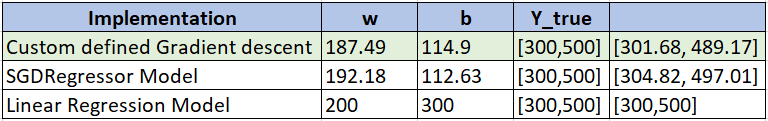

* Learnable parameters w and b identified using custom defined gradient descent function is closer to parameters found using skleanrs SGD Regressor & Linear regression mode

<b> * Lets try the GD for multiple input features

* compute_cost_vect to make predictions & to calculate the total cost 
* Vectorized implementation

In [ ]:
def compute_cost_vec(x, y, w, b):
    print('**compute_cost_vec**')
    m    = x.shape[0] 
    cost = 0                                #Number of samples
    y_pred = []

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b          #Linear function to make the prediction
        print(f"Predicted value: {f_wb}")
        y_pred.append(f_wb)
    
        cost = cost + (f_wb - y[i])**2      #Keep compounding the error by considering the difference between pred & truth
        total_cost = cost * (1/(2*m))       #Take average of the total cost

    print('****************')
    return y_pred, total_cost

* Verify the above function by passing random value for w, m

In [ ]:
x = np.array([[10,20,30], [20, 40, 60]])
y = [100, 200]
w = np.array([0.1, 0.2, 0.3])
b = 0

compute_cost_vec(x, y, w, b)



<b> compute_gradient_vect function </b>
* Take array of vectors as input - go through each array by array
* Calculate the prediction and then find the slope(gradeints)

In [ ]:
def compute_gradients_vect(x, y, w, b):
    print("**compute_gradients_vect**")
    m = x.shape[0]
    print(f"Number of data points {m}")
    
    dj_dw = 0
    dj_db = 0

    dj_dw_temp, dj_db_temp = 0,0

    for i in range(0,m):
        print(f"Index {i}")
        f_wb = np.dot(w, x[i]) + b
        
        print(f"f_wb {f_wb}")
        print(f"y[{i}] : {y[i]} ")

        dj_dw_temp = (f_wb - y[i]) * x[i]
        dj_db_temp = (f_wb - y[i])

        print(f"dj_db_temp: {dj_db_temp}")

        dj_dw += dj_dw_temp
        dj_db += dj_db_temp
    
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    print(f"dj_dw: {dj_dw}")
    print(f"dj_db: {dj_db}")
    print('*******************')

    return dj_dw, dj_db


* Verify the above function

In [ ]:
x = np.array([[10,20,30], [20, 40, 60]])
y = [100, 200]
w = np.array([0.1, 0.2, 0.3])
b = 0

compute_gradients_vect(x, y, w, b)

<b> Gradient Descent function </b>
* Function to update the learnable parameters w & b based on the learning rate defined
* Returns the final learnable parameters after executing the defined iterations or until the convergence threshold is satisfied

In [ ]:
def gradient_descent_vect(x, y, w_in, b_in, alpha=0.01, num_iter=50, conv_threshold=0.001):
    
    tic = time.time()

    j_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iter):

        print(f"Iteration {i}")
            
        dj_dw, dj_db = compute_gradients_vect(x, y, w, b)

        #print(dj_dw, dj_db)

        #update the parameters w & b
        w_new = w - alpha * dj_dw
        b_new = b - alpha * dj_db

        print(f" W updated from {w} to {w_new}")
        print(f" b updated from {b} to {b_new}")

        
        
        if (abs(w - w_new) < conv_threshold).all() & (abs(b - b_new) < conv_threshold).all():
            print(f"Converged")
            break
        else:
            w = w_new
            b = b_new

            Y_pred, total_cost = compute_cost_vec(x, y, w, b)
            j_history.append(total_cost)
            p_history.append([w, b])

        if i % 10 == 0:
            print(f"{num_iter - 1} done, computing cost with available parameter {w} & {b}")
            print(f"Current cost is {j_history[i]}")

    toc = time.time()
    time_taken = (toc - tic) * 1000
    print(f"Time taken for Gradient descent {time_taken:.4f} ms")

    return w, b, j_history, p_history, i


In [ ]:
x = np.array([[10,20,30], [20, 40, 60]])
y = [100, 200]
w = np.array([0.1, 0.2, 0.3])
b = 1

final_w, final_b, j_history, p_history, iters = gradient_descent_vect(x, y, w,b, 0.0001, 25)
print(f"Value for w is {final_w}")
print(f"Value for b is {final_b}")
print(f"Value for j_history is {j_history}")
print(f"Value for p_history is {p_history}")
print(f"Number of iterations executed {iters}")

* Identified learnable paramaters values are as below <br>
Value for w is [0.70889308 1.41778615 2.12667923] <br>
Value for b is 1.0363791503604132 <br>
<br>
* Converged within 15 iterations as parameter values did change much

<b> Make predictions with identified parameters

In [ ]:
w = [0.70889308, 1.41778615, 2.12667923]
b = 1.0363791503604132

x = np.array([[10,20,30], [20, 40, 60]])
y = [100, 200]

y_pred, total_cost = compute_cost_vec(x, y, final_w, final_b)

print(f"y_pred: {y_pred}")


In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(np.arange(iters), j_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

* From above graph, cost clearly decreases with increase in iterations

<b> Lets fit the same training data with sklearns Linearregression & verify the parameters </b>

In [ ]:
lr = LinearRegression()
lr.fit(x,y)
lr.predict(x)

In [ ]:
lr.coef_, lr.intercept_

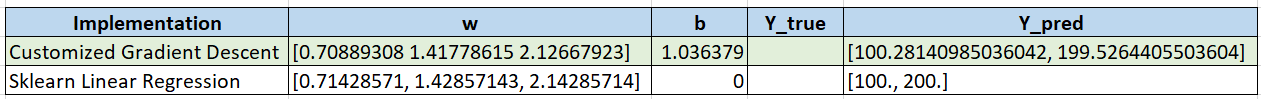

* Learnable parameters w identified using the custom Gradient descent function is closer to the parameters found using sklearn's Linear Regression 

<b> Lets repeat the exercise with Boston housing dataset </b>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv(".\HousingData.csv")
print(f"Shape of data is {data.shape}")
data.head(4)

In [ ]:
data.info()

In [ ]:
data.fillna(0, inplace=True)
data.info()

In [ ]:
X = data.drop('MEDV', axis=1)
Y = data['MEDV']

print(X.shape, Y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1702)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print(f"Train score is {lr.score(X_train_scaled, y_train)}")
print(f"Test score is {lr.score(X_test_scaled, y_test)}")

y_pred = lr.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
coefficients = pd.DataFrame(data=lr.coef_,index=X.columns)
coefficients.columns = ['LR-coefficients']
coefficients

In [ ]:
lr.coef_, lr.intercept_

* Use SKlearns SGDRegressor to train the model

In [ ]:
sgdr = SGDRegressor()
sgdr.fit(X_train_scaled, y_train)

print(f"Train accuracy: {sgdr.score(X_train_scaled, y_train)}")
print(f"Test  accuracy: {sgdr.score(X_test_scaled, y_test)}")

print(f"Coeff are: {sgdr.coef_}")
print(f"Intercept: {sgdr.intercept_}")

In [ ]:
coefficients['SGDR-Coefficients'] = sgdr.coef_
coefficients

<b> Lets solve the problem using the custom defined gradient descent function </b>

In [ ]:
X_train

In [ ]:
w = np.ones(X_train.shape[1])
b = 1

final_w, final_b, j_history, p_history, iters = gradient_descent_vect(X_train_scaled, np.array(y_train), w,b, 0.01, 1000)
print(f"Value for w is {final_w}")
print(f"Value for b is {final_b}")
print(f"Value for j_history is {j_history}")
print(f"Value for p_history is {p_history}")
print(f"Number of iterations executed {iters}")

In [ ]:
print(f"Value for w is {final_w}")
print(f"Value for b is {final_b}")
print(f"Value for j_history is {j_history}")
print(f"Least cost value is {j_history[-1]}")
print(f"Value for p_history is {p_history}")
print(f"Number of iterations executed {iters}")

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(np.arange(iters), j_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
coefficients['CustomGD-Coefficients'] = final_w
coefficients

In [ ]:
y_pred_tr, total_cost = compute_cost_vec(X_train_scaled, np.array(y_train), final_w, final_b)
print(f"total cost {total_cost}")

In [ ]:
from sklearn.metrics import r2_score

print(f"Train accuracy: {r2_score(y_train, y_pred_tr)}")

In [ ]:
y_pred, total_cost = compute_cost_vec(X_test_scaled, np.array(y_test), final_w, final_b)
print(f"total cost {total_cost}")

In [ ]:
from sklearn.metrics import r2_score

print(f"Test accuracy: {r2_score(y_test, y_pred)}")

* Clearly learning rate plays a important role - alpha 0.01 was more appropriate for this boston dataset for the custom defined Gradient descent to give a score of 76% <br>

* Coefficients & intercepts between custom GD, LR & SGDR are very close to each other <br>

* Train score(70%) & test score(76%) among custom GD, LR & SGDR are very close to each other